In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import numpy as np


def show_conf_matrix(predicted, y):
    confusion_matr = confusion_matrix(y, predicted)
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matr)
    fig, ax = plt.subplots(figsize=(10, 10))
    confusion_matrix_display.plot(ax=ax)


def cross_val(classifier, X, y, k, shuffle=False):
    kf = KFold(n_splits=k, shuffle=shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list


def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val(classifier, X_train, y_train, 5)
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    accur = accuracy / len(accuracy_list)
    print("Accuracy %.4f" % accur)
    returned_classifier = trained_classifier[np.argmax(accuracy_list)]
    return returned_classifier


def show_result(clf, X_train, y_train, X_val, y_val):
    best_classifier = check_classifier(clf, X_train, y_train, X_val, y_val)
    prediction = best_classifier.predict(X_val)
    show_conf_matrix(y_val, prediction)
    return best_classifier

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
train_samples = 10000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=train_samples, test_size=2000)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [1, 2, 5, 10]
}

rfc = RandomForestClassifier()

rfc_gscv = GridSearchCV(rfc, param_grid)
rfc_gscv.fit(X, y)
print(rfc_gscv.best_params_)

{'max_depth': 10, 'n_estimators': 400}


[0.9345, 0.9395, 0.937, 0.924, 0.942]
Accuracy 0.9396


RandomForestClassifier(max_depth=10, n_estimators=400)

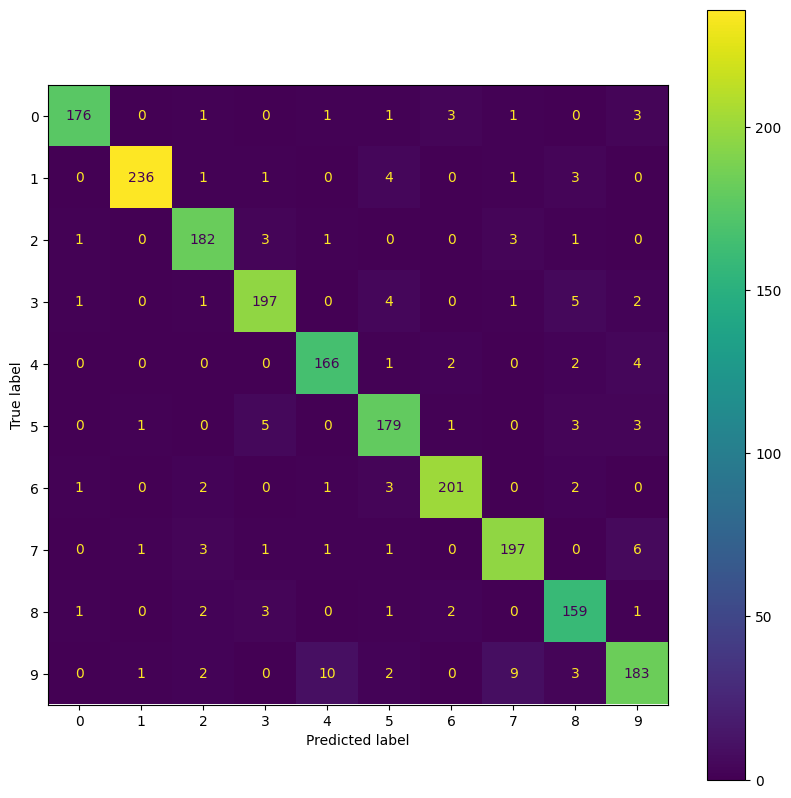

In [4]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=400)
show_result(rfc, train_x, train_y, test_x, test_y)